## Business Goal:

A health crisis of massive proportion such as the current COVID-19 pandemic provides us with an opportunity to ponder and reflect over what we can better in the way we deal with healthcare to make us humans be more prepared for such an event in the future. 

During the entire course of this pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources. They have been in the dark failing to understand how much resource they could need the week after as the COVID-19 curve has swayed very unpredictably. In these tough times, being able to predict what kind of resource an individual might require the moment he is tested positive for COIVD-19 can be a game-changer as hospitals and authorities will be able to prepare ahead of time and procure or arrange for the resources necessary to save that one important life of a patient. 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
covid = pd.read_csv("covid.csv", encoding = "ISO-8859-1", low_memory = False)

In [5]:
covid.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2
7,1,1,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,97
8,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,97
9,1,2,1,1,39,2,2,2,2,2,2,2,2,1,2,2,99,1,2


In [6]:
covid.shape

(566602, 19)

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 19 columns):
sex                    566602 non-null int64
patient_type           566602 non-null int64
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 non-null int64
contact_other_covid    566602 non-null int64
covid_res              566602 non-null int64
icu                    566602 non-null int64
dtypes: int64(19)
memory usage: 82

### Data Cleaning and Preparation:

We see that there are some unknown values in every column that, represnted by numbers other than 1 and 2 will not add value to our analysis. So, we are starting with removing all other values except 1 and 2 and then encoding them to 0s and 1s to feed the model.

In [8]:
#eliminating data that doesn't add value to our model.
covid = covid.loc[(covid.intubed == 1) | (covid.intubed == 2)]
covid = covid.loc[(covid.patient_type == 1) | (covid.patient_type == 2)]
covid = covid.loc[(covid.pneumonia == 1) | (covid.pneumonia == 2)]
covid = covid.loc[(covid.diabetes == 1) | (covid.diabetes == 2)]
covid = covid.loc[(covid.copd == 1) | (covid.copd == 2)]
covid = covid.loc[(covid.asthma == 1) | (covid.asthma == 2)]
covid = covid.loc[(covid.inmsupr == 1) | (covid.inmsupr == 2)]
covid = covid.loc[(covid.hypertension == 1) | (covid.hypertension == 2)]
covid = covid.loc[(covid.other_disease == 1) | (covid.other_disease == 2)]
covid = covid.loc[(covid.cardiovascular == 1) | (covid.cardiovascular == 2)]
covid = covid.loc[(covid.obesity == 1) | (covid.obesity == 2)]
covid = covid.loc[(covid.renal_chronic == 1) | (covid.renal_chronic == 2)]
covid = covid.loc[(covid.tobacco == 1) | (covid.tobacco == 2)]
#taking only the covid positive cases
covid = covid.loc[(covid.covid_res == 1)]
covid = covid.loc[(covid.icu == 1) | (covid.icu == 2)]

In [9]:
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


In [10]:
covid.sex = covid.sex.apply(lambda x: x if x == 1 else 0)
covid.patient_type = covid.patient_type.apply(lambda x: x if x == 1 else 0)
covid.intubed = covid.intubed.apply(lambda x: x if x == 1 else 0)
covid.pneumonia = covid.pneumonia.apply(lambda x: x if x == 1 else 0)
covid.diabetes = covid.diabetes.apply(lambda x: x if x == 1 else 0)
covid.copd = covid.copd.apply(lambda x: x if x == 1 else 0)
covid.asthma = covid.asthma.apply(lambda x: x if x == 1 else 0)
covid.inmsupr = covid.inmsupr.apply(lambda x: x if x == 1 else 0)
covid.hypertension = covid.hypertension.apply(lambda x: x if x == 1 else 0)
covid.other_disease = covid.other_disease.apply(lambda x: x if x == 1 else 0)
covid.cardiovascular = covid.cardiovascular.apply(lambda x: x if x == 1 else 0)
covid.obesity = covid.obesity.apply(lambda x: x if x == 1 else 0)
covid.renal_chronic = covid.renal_chronic.apply(lambda x: x if x == 1 else 0)
covid.tobacco = covid.tobacco.apply(lambda x: x if x == 1 else 0)
covid.icu = covid.icu.apply(lambda x: x if x == 1 else 0)

In [11]:
covid.drop(columns = ['pregnancy', 'contact_other_covid', 'patient_type','hypertension'], inplace = True)

In [12]:
covid.head()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
2,1,0,0,54,0,0,0,0,0,0,1,0,0,1,0
3,0,0,1,30,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,60,1,0,0,0,0,1,0,0,0,1,0
5,0,0,1,47,1,0,0,0,0,0,0,0,0,1,1
6,0,0,0,63,0,0,0,0,0,0,0,0,0,1,0


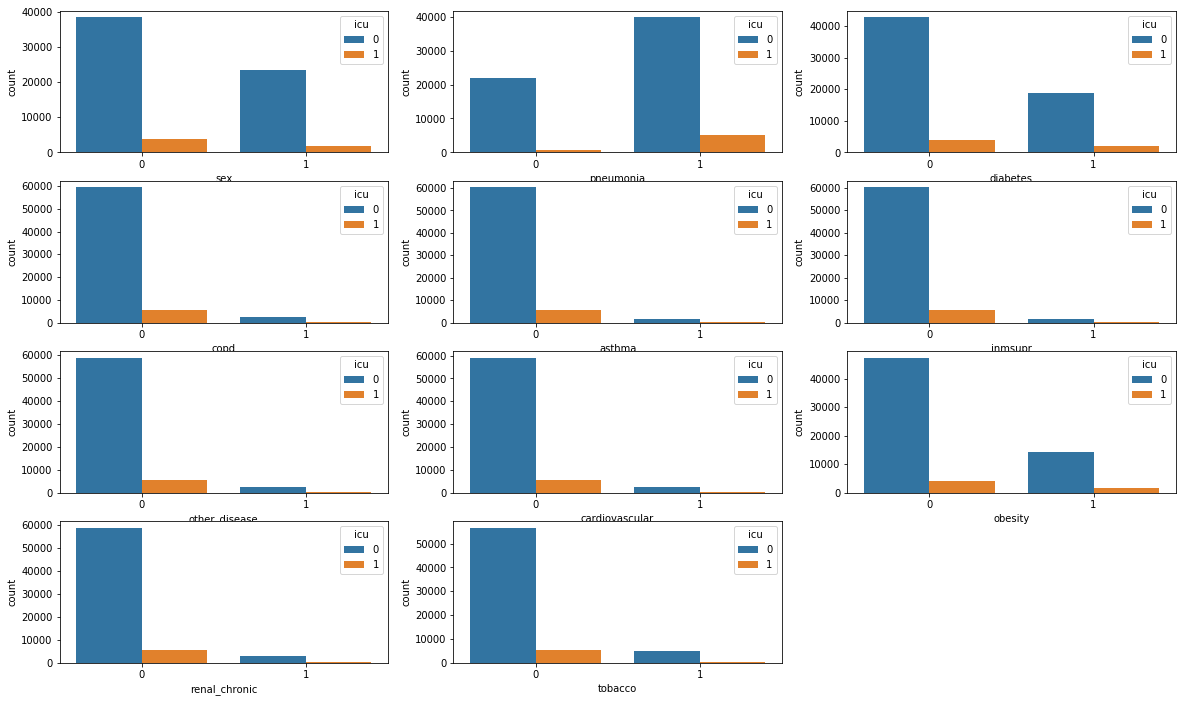

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.countplot(x = 'sex', hue = 'icu', data = covid)
plt.subplot(4,3,2)
sns.countplot(x = 'pneumonia', hue = 'icu', data = covid)
plt.subplot(4,3,3)
sns.countplot(x = 'diabetes', hue = 'icu', data = covid)
plt.subplot(4,3,4)
sns.countplot(x = 'copd', hue = 'icu', data = covid)
plt.subplot(4,3,5)
sns.countplot(x = 'asthma', hue = 'icu', data = covid)
plt.subplot(4,3,6)
sns.countplot(x = 'inmsupr', hue = 'icu', data = covid)
plt.subplot(4,3,7)
sns.countplot(x = 'other_disease', hue = 'icu', data = covid)
plt.subplot(4,3,8)
sns.countplot(x = 'cardiovascular', hue = 'icu', data = covid)
plt.subplot(4,3,9)
sns.countplot(x = 'obesity', hue = 'icu', data = covid)
plt.subplot(4,3,10)
sns.countplot(x = 'renal_chronic', hue = 'icu', data = covid)
plt.subplot(4,3,11)
sns.countplot(x = 'tobacco', hue = 'icu', data = covid)
plt.show()

From the above plots we get a overview of the distribution of data where icu=1 represents that the person was admitted to icu and 0 represents he/she wasn't. We observe that people who have diabetes, copd, asthma, obesity are more likely to need icu.

In [14]:
covid.shape

(67300, 15)

### Building the model:

#### Splitting the dataset into train and test sets: 

In [15]:
train, test = train_test_split(covid, test_size = 0.3, random_state = 100)

In [16]:
train.shape

(47110, 15)

#### Feature Sacling:

In [17]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()
train[['age']] = scaler.fit_transform(train[['age']])

In [18]:
train.describe()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
count,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.000000,47110.0,47110.000000
mean,0.374549,0.093420,0.664105,0.537123,0.308151,0.035258,0.022925,0.025133,0.043855,0.042029,0.235598,0.047973,0.081448,1.0,0.083761
std,0.484011,0.291023,0.472307,0.154799,0.461734,0.184433,0.149666,0.156530,0.204774,0.200658,0.424376,0.213711,0.273524,0.0,0.277033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.436893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,1.000000,0.543689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
75%,1.000000,0.000000,1.000000,0.640777,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [19]:
y_train_icu = train.pop('icu')
X_train_icu = train

In [20]:
test[['age']] = scaler.transform(test[['age']])

In [21]:
y_test = test.pop('icu')
X_test = test

0.9190688459633481

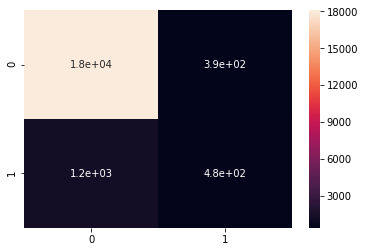

In [22]:
#using Logistic Regression to train the model and predict results
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_icu, y_train_icu)

y_pred_svm = classifier_lr.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred_svm)

The confusion matrix, also called error matrix describes the performance of a classification model(here, logistic regression) on a test data. The observations from the confusion matrix are:

- True Positive (TP) : Observation is positive, and is predicted to be positive=18075
- False Negative (FN) : Observation is positive, but is predicted negative=394
- True Negative (TN) : Observation is negative, and is predicted to be negative=481 
- False Positive (FP) : Observation is negative, but is predicted positive=1240

Accuracy=(TP+TN)/(TP+FN+TN+FP)=0.917731550272412~91.8%
Recall=TP/(TP+FN)=0.972223726~97.3%
Here, our goal is to reduce the False Negatives as we are trying to reduce the number of people who actually needed icu but were predicted not to. So, our FN%=1-Recall~2.7% which is quite less.

Precision of model = 18075/(18075 + 394) = 97.%

Recall of model = 18075/(18075 + 394) = 96.50%